In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
# Load the TED_talks dataset
ted_data = pd.read_csv("ted_main.csv")
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
# Extract the "duration" column
duration = ted_data["duration"].values

In [4]:
# Define the Gaussian kernel function
def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*u**2)

# Define the Parzen window function
def parzen_window(x, data, h, kernel):
    n = len(data)
    density = 0
    for i in range(n):
        u = (x - data[i])/h
        density += kernel(u)
    density /= (n*h)
    return density

In [6]:
#Define the range of values to estimate the density
x_range = np.linspace(np.min(duration), np.max(duration), num=1000)

# Set the window size to 10
h = 10

# Estimate the density using the Parzen window method with the Gaussian kernel
density = [parzen_window(x, duration, h, gaussian_kernel) for x in x_range]


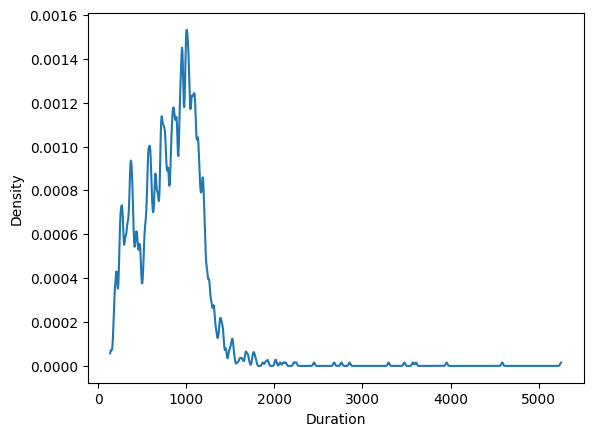

In [7]:
# Plot the estimated density
plt.plot(x_range, density)
plt.xlabel("Duration")
plt.ylabel("Density")
plt.show()

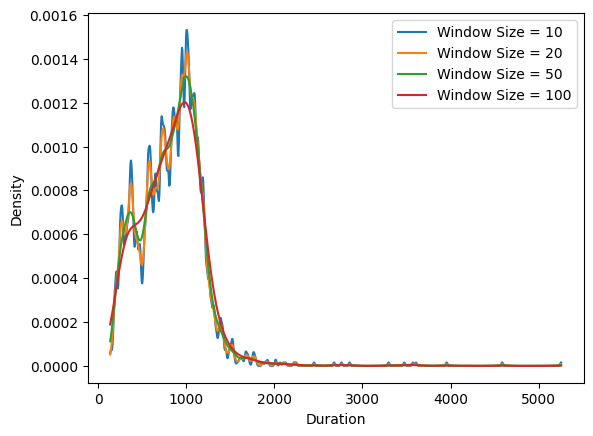

In [8]:
# Define the range of values to estimate the density
x_range = np.linspace(np.min(duration), np.max(duration), num=1000)

# Set the window sizes to test
h_values = [10 ,20, 50, 100]

# Estimate the density using the Parzen window method with the Gaussian kernel
densities = []
for h in h_values:
    density = [parzen_window(x, duration, h, gaussian_kernel) for x in x_range]
    densities.append(density)

# Plot the estimated densities for each window size
plt.plot(x_range, densities[0], label="Window Size = 10")
plt.plot(x_range, densities[1], label="Window Size = 20")
plt.plot(x_range, densities[2], label="Window Size = 50")
plt.plot(x_range, densities[3], label="Window Size = 100")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.legend()
plt.show()

In [13]:
# Set the number of data points to use for estimation
n_values = np.linspace(250, len(duration), num=250, dtype=int)

# Initialize an array to store the estimated densities
density_estimates = np.zeros((len(n_values), len(x_range)))

In [14]:
# Estimate the density for each number of data points
for i, n in enumerate(n_values):
    # Select a random sample of n data points from the duration column
    sample = np.random.choice(duration, size=n, replace=False)
    # Calculate the density estimate using Gaussian kernel density estimation
    density_estimates[i] = gaussian_kde(sample)(x_range)

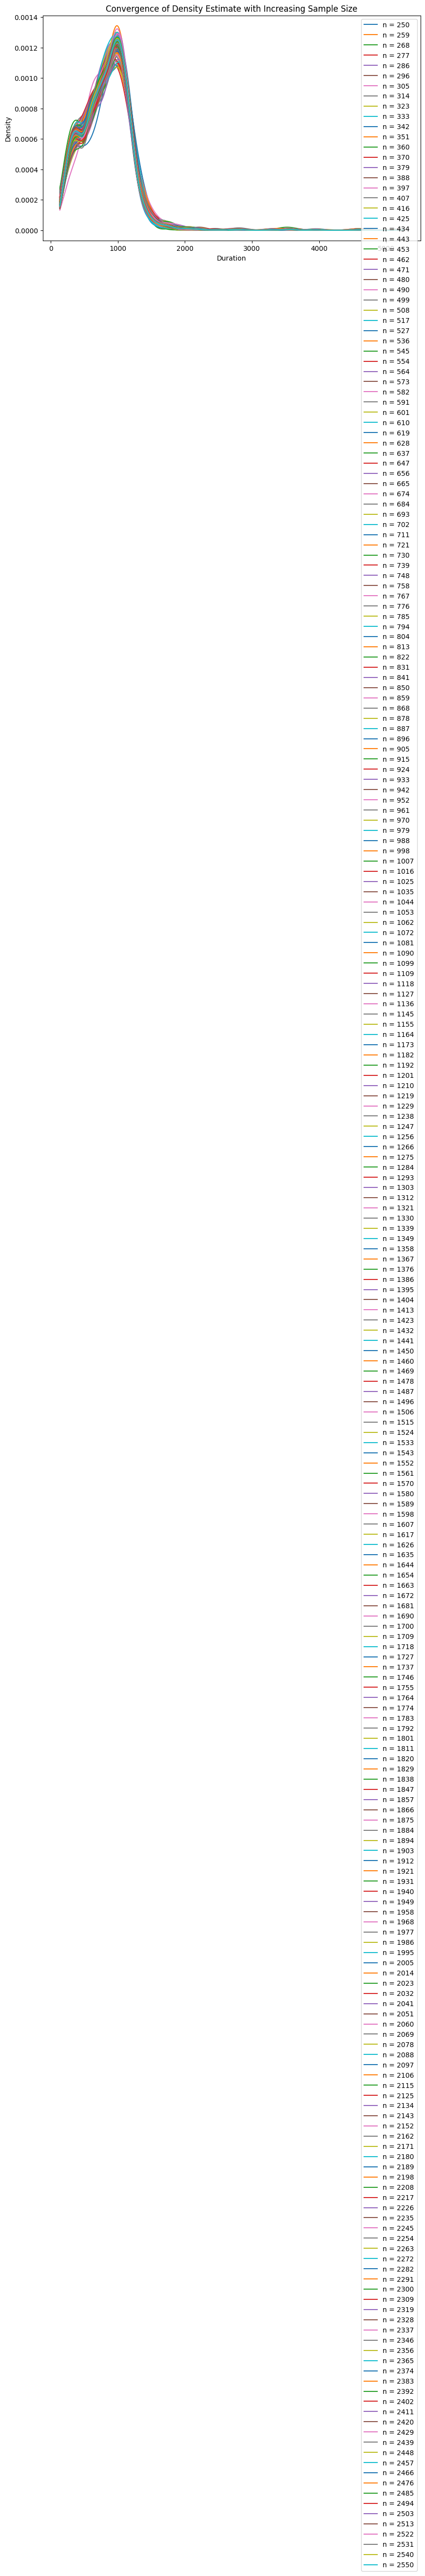

In [15]:
# Plot the estimated densities for each number of data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Duration")
ax.set_ylabel("Density")
ax.set_title("Convergence of Density Estimate with Increasing Sample Size")
for i, n in enumerate(n_values):
    ax.plot(x_range, density_estimates[i], label=f"n = {n}")
ax.legend()
plt.show()